In [5]:
import os
import shutil
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [69]:

BASE_DIR = r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté'

In [70]:
BASE_DIR

'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté'

In [71]:
RANDOM_SEED = 7 # for reproducibility
COUNTRIES_DIR = os.path.join(BASE_DIR, 'Data', 'countries')
PROCESSED_DIR = os.path.join(BASE_DIR, 'Data', 'processed')

In [72]:
# these relate to training the CNN to predict nightlights
CNN_TRAIN_IMAGE_DIR = os.path.join(BASE_DIR, 'Data', 'cnn_images')
CNN_SAVE_DIR = os.path.join(BASE_DIR, 'models')

In [73]:
os.makedirs(CNN_TRAIN_IMAGE_DIR, exist_ok=True)
os.makedirs(CNN_SAVE_DIR, exist_ok=True)

#### Suppression des images non listées dans le DataFrame
- Certaines images ont été telechargé et du à la rupture de la connection le téléchargement a repris
- mais n'a pas pris en considération les images déjà télécharger 
- et donc ne les as pas sauvegarder dans 'image_download_locs.csv', et donc celà peut conduire à une erreur. 

In [83]:
# Importation des bibliothèques nécessaires
import pandas as pd
import os

# Définition des chemins de base
BASE_DIR = r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté'  
PROCESSED_DIR = os.path.join(BASE_DIR, 'Data', 'processed')

# Chargement du DataFrame à partir du fichier CSV
df_download = pd.read_csv(os.path.join(PROCESSED_DIR, 'image_download_locs.csv'))

# Listing de toutes les images présentes dans le répertoire cible
repertoire_images = os.path.join(BASE_DIR, 'Data', 'images5')
images_telechargees = os.listdir(repertoire_images)

# Création d'un ensemble des noms d'images du DataFrame pour une recherche rapide
ensemble_noms_images = set(df_download['image_name'])

# Suppression des images qui ne sont pas listées dans le DataFrame
for image in images_telechargees:
    if image not in ensemble_noms_images:
        chemin_image = os.path.join(repertoire_images, image)
        try:
            os.remove(chemin_image)  # Tentative de suppression sécurisée du fichier
            print(f"Supprimée : {image}")  # Optionnel : affiche le nom de chaque image supprimée
        except Exception as e:
            print(f"Erreur lors de la suppression de {image} : {e}")


Supprimée : 5.242132799551382_-3.9102555969648627_5.24194916244596_-3.91031507402658.png
Supprimée : 5.242405272800031_-3.910777356436221_5.24284745100886_-3.91080214641988.png
Supprimée : 5.243425342689732_-3.9105308919691026_5.24373_-3.9104187.png
Supprimée : 5.2436418257605615_-3.9007877472661723_5.24365408346057_-3.90037874691188.png
Supprimée : 5.243781359827691_-3.9114424540503028_5.243616_-3.9114279.png
Supprimée : 5.243865438774945_-3.909694818185642_5.2437993_-3.9099968.png
Supprimée : 5.244046791177212_-3.9006862429720917_5.24368346203119_-3.90036977827549.png
Supprimée : 5.2441109410032505_-3.901145768528719_5.2443821_-3.9012548.png
Supprimée : 5.244306739763557_-3.9112515476622027_5.2439607353881_-3.91125326044858.png
Supprimée : 5.244545378327241_-3.9014327964249444_5.24477256461978_-3.90144953504205.png
Supprimée : 5.245004139431673_-3.9008515048469348_5.24460643529892_-3.90081821009517.png
Supprimée : 5.246894888971315_-3.938989056386513_5.24696640204638_-3.9385958667844

# Traitement 


In [84]:
df_download = pd.read_csv(os.path.join(PROCESSED_DIR, 'image_download_locs.csv'))
downloaded=os.listdir(os.path.join(BASE_DIR, 'Data', 'images5'))

In [85]:
downloaded

['5.31527646878189_-4.25666281994069_5.31572562642395_-4.25696225836873.png',
 '5.31542618799591_-4.25651310072667_5.31572562642395_-4.25696225836873.png',
 '5.315575907209929_-4.25666281994069_5.31572562642395_-4.25696225836873.png',
 '5.315575907209929_-4.256812539154709_5.31572562642395_-4.25696225836873.png',
 '5.31572562642395_-4.257261696796769_5.31572562642395_-4.25696225836873.png',
 '5.31575201605833_-4.25514690577984_5.31620117370039_-4.25514690577984.png',
 '5.3157794248817_-4.25655357519346_5.31622858252376_-4.25640385597944.png',
 '5.31587534563797_-4.256812539154709_5.31572562642395_-4.25696225836873.png',
 '5.31587534563797_-4.25696225836873_5.31572562642395_-4.25696225836873.png',
 '5.31587534563797_-4.257261696796769_5.31572562642395_-4.25696225836873.png',
 '5.31590173527235_-4.25544634420788_5.31620117370039_-4.25514690577984.png',
 '5.31592914409572_-4.25595469833738_5.31622858252376_-4.25640385597944.png',
 '5.31592914409572_-4.2561044175514_5.31622858252376_-4.256

In [86]:
print(f"actually downloaded: {len(downloaded)}, expected: {len(df_download)}")

actually downloaded: 2934, expected: 283927


In [87]:
df_download.head()

,image_name,image_lat,image_lon,cluster_lat,cluster_lon,pcexp,nightlights,nightlights_bin
0,5.34009194235794_-4.02647945764206_5.3405411_-...,5.340092,-4.026479,5.340541,-4.02603,1020831.75,175.0,1
1,5.340241661571961_-4.02647945764206_5.3405411_...,5.340242,-4.026479,5.340541,-4.02603,1020831.75,175.0,1
2,5.34039138078598_-4.02647945764206_5.3405411_-...,5.340391,-4.026479,5.340541,-4.02603,1020831.75,175.0,1
3,5.3405411_-4.02647945764206_5.3405411_-4.02603...,5.340541,-4.026479,5.340541,-4.02603,1020831.75,175.0,1
4,5.340690819214021_-4.02647945764206_5.3405411_...,5.340691,-4.026479,5.340541,-4.02603,1020831.75,175.0,1


In [88]:
df_download['row']=np.arange(len(df_download))

In [89]:
df_download.info

<bound method DataFrame.info of                                                image_name  image_lat  \
0       5.34009194235794_-4.02647945764206_5.3405411_-...   5.340092   
1       5.340241661571961_-4.02647945764206_5.3405411_...   5.340242   
2       5.34039138078598_-4.02647945764206_5.3405411_-...   5.340391   
3       5.3405411_-4.02647945764206_5.3405411_-4.02603...   5.340541   
4       5.340690819214021_-4.02647945764206_5.3405411_...   5.340691   
...                                                   ...        ...   
283922  6.55055398526215_-4.50856612063944_6.550104827...   6.550554   
283923  6.54995510840607_-4.5082666822114_6.5501048276...   6.549955   
283924  6.55010482762009_-4.5082666822114_6.5501048276...   6.550105   
283925  6.55040426604813_-4.5082666822114_6.5501048276...   6.550404   
283926  6.55025454683411_-4.50811696299738_6.550104827...   6.550255   

        image_lon  cluster_lat  cluster_lon       pcexp  nightlights  \
0       -4.026479     5.340541 

In [90]:
idx_not_download = df_download.set_index('image_name').drop(downloaded)['row'].values.tolist()

In [91]:
idx_not_download
df_download.drop(idx_not_download, inplace=True)

In [92]:
df_download.drop('row', axis=1, inplace=True)

In [93]:
df_download.info

<bound method DataFrame.info of                                               image_name  image_lat  \
21961  5.4638471458443405_-4.05723036205941_5.4641465...   5.463847   
21962  5.46399686505836_-4.05723036205941_5.464146584...   5.463997   
21963  5.46414658427238_-4.05723036205941_5.464146584...   5.464147   
21964  5.4642963034864005_-4.05723036205941_5.4641465...   5.464296   
21965  5.46444602270042_-4.05723036205941_5.464146584...   5.464446   
...                                                  ...        ...   
24948  6.859985734133001_-6.430992092734161_6.8598360...   6.859986   
24949  6.86013545334702_-6.430992092734161_6.85983601...   6.860135   
24950  6.86028517256104_-6.430992092734161_6.85983601...   6.860285   
24951  6.85938685727692_-6.43084237352014_6.859836014...   6.859387   
24952  6.859536576490941_-6.43084237352014_6.85983601...   6.859537   

       image_lon  cluster_lat  cluster_lon     pcexp  nightlights  \
21961  -4.057230     5.464147    -4.056781  51

In [94]:
# the distribution
(df_download['nightlights_bin']==0).mean(), (df_download['nightlights_bin']==1).mean(), (df_download['nightlights_bin']==2).mean()

(0.24096796182685754, 0.09986366734832992, 0.6591683708248125)

##### Split images into train/valid. Each cluster will contribute 80% of images for training, and 20% for validation.


In [95]:
df_download.reset_index(drop=True, inplace=True)

In [96]:
df_download.head()

,image_name,image_lat,image_lon,cluster_lat,cluster_lon,pcexp,nightlights,nightlights_bin
0,5.4638471458443405_-4.05723036205941_5.4641465...,5.463847,-4.05723,5.464147,-4.056781,518465.0,181.0,1
1,5.46399686505836_-4.05723036205941_5.464146584...,5.463997,-4.05723,5.464147,-4.056781,518465.0,181.0,1
2,5.46414658427238_-4.05723036205941_5.464146584...,5.464147,-4.05723,5.464147,-4.056781,518465.0,181.0,1
3,5.4642963034864005_-4.05723036205941_5.4641465...,5.464296,-4.05723,5.464147,-4.056781,518465.0,181.0,1
4,5.46444602270042_-4.05723036205941_5.464146584...,5.464446,-4.05723,5.464147,-4.056781,518465.0,181.0,1


In [97]:
df_download.info

<bound method DataFrame.info of                                              image_name  image_lat  image_lon  \
0     5.4638471458443405_-4.05723036205941_5.4641465...   5.463847  -4.057230   
1     5.46399686505836_-4.05723036205941_5.464146584...   5.463997  -4.057230   
2     5.46414658427238_-4.05723036205941_5.464146584...   5.464147  -4.057230   
3     5.4642963034864005_-4.05723036205941_5.4641465...   5.464296  -4.057230   
4     5.46444602270042_-4.05723036205941_5.464146584...   5.464446  -4.057230   
...                                                 ...        ...        ...   
2929  6.859985734133001_-6.430992092734161_6.8598360...   6.859986  -6.430992   
2930  6.86013545334702_-6.430992092734161_6.85983601...   6.860135  -6.430992   
2931  6.86028517256104_-6.430992092734161_6.85983601...   6.860285  -6.430992   
2932  6.85938685727692_-6.43084237352014_6.859836014...   6.859387  -6.430842   
2933  6.859536576490941_-6.43084237352014_6.85983601...   6.859537  -6.430842

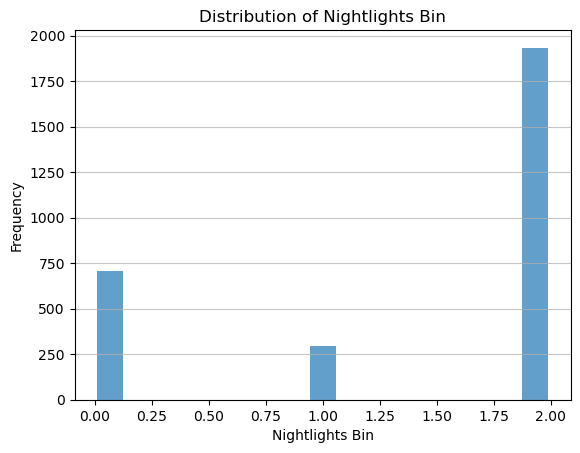

In [98]:

import matplotlib.pyplot as plt

# Assuming df_download is your DataFrame and it has a column named "nightlights_bin"
plt.hist(df_download['nightlights_bin'], bins='auto', alpha=0.7, rwidth=0.85)

plt.xlabel('Nightlights Bin')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.title('Distribution of Nightlights Bin')  # Title of the histogram

plt.grid(axis='y', alpha=0.75)
plt.show()


In [99]:
df_download['is_train'] = True

In [100]:
np.random.seed(RANDOM_SEED)
groups = df_download.groupby(['cluster_lat', 'cluster_lon'])
for _, g in groups:
    n_ims = len(g)
    n_train = int(0.8 * n_ims)
    n_valid = n_ims - n_train
    valid_choices = np.random.choice(np.arange(n_ims), replace=False, size=n_valid).tolist()
    current_index = g.index
    idx_valid = current_index[valid_choices]
    df_download['is_train'].loc[idx_valid] = False

C:\Users\d\AppData\Local\Temp\ipykernel_26236\973037459.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_download['is_train'].loc[idx_valid] = False
C:\Users\d\AppData\Local\Temp\ipykernel_26236\973037459.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_download['is_train'].loc[idx_valid] = False
C:\Users\d\AppData\Local\Temp\ipykernel_26236\973037459.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_download['is_tr

In [101]:
df_download['is_train'].mean()

0.7958418541240627

In [102]:
groups

In [103]:
df_download

,image_name,image_lat,image_lon,cluster_lat,cluster_lon,pcexp,nightlights,nightlights_bin,is_train
0,5.4638471458443405_-4.05723036205941_5.4641465...,5.463847,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True
1,5.46399686505836_-4.05723036205941_5.464146584...,5.463997,-4.057230,5.464147,-4.056781,518465.0,181.0,1,False
2,5.46414658427238_-4.05723036205941_5.464146584...,5.464147,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True
3,5.4642963034864005_-4.05723036205941_5.4641465...,5.464296,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True
4,5.46444602270042_-4.05723036205941_5.464146584...,5.464446,-4.057230,5.464147,-4.056781,518465.0,181.0,1,True
...,...,...,...,...,...,...,...,...,...
2929,6.859985734133001_-6.430992092734161_6.8598360...,6.859986,-6.430992,6.859836,-6.430842,611718.1,186.0,2,False
2930,6.86013545334702_-6.430992092734161_6.85983601...,6.860135,-6.430992,6.859836,-6.430842,611718.1,186.0,2,True
2931,6.86028517256104_-6.430992092734161_6.85983601...,6.860285,-6.430992,6.859836,-6.430842,611718.1,186.0,2,True
2932,6.85938685727692_-6.43084237352014_6.859836014...,6.859387,-6.430842,6.859836,-6.430842,611718.1,186.0,2,True


In [104]:
df_download.info

<bound method DataFrame.info of                                              image_name  image_lat  image_lon  \
0     5.4638471458443405_-4.05723036205941_5.4641465...   5.463847  -4.057230   
1     5.46399686505836_-4.05723036205941_5.464146584...   5.463997  -4.057230   
2     5.46414658427238_-4.05723036205941_5.464146584...   5.464147  -4.057230   
3     5.4642963034864005_-4.05723036205941_5.4641465...   5.464296  -4.057230   
4     5.46444602270042_-4.05723036205941_5.464146584...   5.464446  -4.057230   
...                                                 ...        ...        ...   
2929  6.859985734133001_-6.430992092734161_6.8598360...   6.859986  -6.430992   
2930  6.86013545334702_-6.430992092734161_6.85983601...   6.860135  -6.430992   
2931  6.86028517256104_-6.430992092734161_6.85983601...   6.860285  -6.430992   
2932  6.85938685727692_-6.43084237352014_6.859836014...   6.859387  -6.430842   
2933  6.859536576490941_-6.43084237352014_6.85983601...   6.859537  -6.430842

In [105]:
# save this new dataframe
df_download.to_csv(os.path.join(PROCESSED_DIR, 'image_download_actual.csv'), index=False)

In [106]:
os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, 'train'), exist_ok=False)
os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, 'valid'), exist_ok=False)

labels = ['0', '1', '2']
for l in labels:
    os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, 'train', l), exist_ok=False)
    os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, 'valid', l), exist_ok=False)

In [109]:
t = df_download[df_download['is_train']]
v = df_download[~df_download['is_train']]

In [110]:
len(t), len(v)

(2335, 599)

In [111]:
# J'ai créer ces ensembles parce que j'aurai besoin d'utiliser ceci pour contourner l'erreur qui va venir
# Qui est: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C
# en essayant de créer des lien symbolique

v.to_csv(os.path.join(BASE_DIR, 'validation_set.csv'), index=False)
t.to_csv(os.path.join(BASE_DIR, 'training_set.csv'), index=False)

In [112]:
#'''Si on voit l'erreur suivante: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire,celà signifie que:
#-Un privilège nécessaire n'est pas détenu par le client, 
#se produit généralement lors de la tentative de création d'un lien symbolique sur Windows 
#sans les privilèges nécessaires.
#-La création de liens symboliques sur Windows nécessite soit des privilèges administratifs, 
#soit un ajustement spécifique de la politique de sécurité.
#Voici comment faire :
#1-Ouvrez l'invite de commande ou Anaconda Prompt ou PowerShell en tant qu'administrateur :
#  -Recherchez "cmd" ou "PowerShell" dans le menu Démarrer.
#  -Cliquez avec le bouton droit sur l'invite de commande ou PowerShell et choisissez "Exécuter en tant qu'administrateur".
#2-Démarrez Jupyter Notebook :
#  -Dans l'invite de commande ou PowerShell administrateur, tapez jupyter notebook et appuyez sur Entrée.
#
#Je vais créer des liens symbolique en lisant les données de validation_set.csv et training_set.csv
#dans un nouveau notebook de jupyter que j'ouvre en tant qu'administrateur, (base) C:\Windows\System32>jupyter notebook
#ensuite, je lis les données avec
#v=pd.read_csv(os.path.join(BASE_DIR, 'validation_set.csv'))
#t=pd.read_csv(os.path.join(BASE_DIR, 'training_set.csv'))

#Ensuite, je crée les liens symboliques avec le code qui est en bas
#et enfin je reviens sur ce notebook que j'ai créé à partir de (base) C:\Users\d>jupyter notebook 
#Deuxième option
#II-Activer le Mode Développeur
#Activer le Mode Développeur sur Windows 10 ou une version ultérieure peut vous permettre de créer des liens symboliques sans privilèges administratifs.Cette option est particulièrement utile si vous préférez ne pas exécuter Jupyter Notebook en tant qu'administrateur. Voici comment activer le Mode Développeur :
#  1-Allez dans Paramètres > Mise à jour et sécurité > Pour les développeurs.
#  2-Activez le Mode Développeur en sélectionnant le bouton radio correspondant.
#  3-Redémarrez votre ordinateur si cela vous est demandé.
import os
from tqdm import tqdm

print('Organizing training images')

# Assuming `t` is your DataFrame or equivalent structure with 'image_name' and 'nightlights_bin'
for im_name, nl in tqdm(zip(t['image_name'], t['nightlights_bin']), total=len(t)):
    # Define the source and destination paths
    src = os.path.abspath(os.path.join(BASE_DIR,'Data', 'images5', im_name))  # Adjusted to not use country_dir
    dest = os.path.join(CNN_TRAIN_IMAGE_DIR, 'train', str(nl), im_name)
    
    # Ensure the destination directory exists
    os.makedirs(os.path.dirname(dest), exist_ok=True)
    
    # Create the symbolic link
    try:
        os.symlink(src, dest)
    except OSError as e:
        print(f"Error creating symlink for {im_name}: {e}")
        # Optionally, you could raise an error or handle it depending on your needs


Organizing training images


  2%|█▍                                                                             | 41/2335 [00:00<00:05, 403.14it/s]

Error creating symlink for 5.4638471458443405_-4.05723036205941_5.46414658427238_-4.05678120441735.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\5.4638471458443405_-4.05723036205941_5.46414658427238_-4.05678120441735.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\1\\5.4638471458443405_-4.05723036205941_5.46414658427238_-4.05678120441735.png'
Error creating symlink for 5.46414658427238_-4.05723036205941_5.46414658427238_-4.05678120441735.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\5.46414658427238_-4.05723036205941_5.46414658427238_-4.05678120441735.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\1\\5.46414658427238_-4.05723036205941_5.46414658427238_-4.05678120441735.png'
Error creating

  7%|█████▎                                                                        | 159/2335 [00:00<00:03, 548.51it/s]

Error creating symlink for 5.48080925764206_-4.1513880192140205_5.4803601_-4.1512383.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\5.48080925764206_-4.1513880192140205_5.4803601_-4.1512383.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\5.48080925764206_-4.1513880192140205_5.4803601_-4.1512383.png'
Error creating symlink for 5.47991094235794_-4.1512383_5.4803601_-4.1512383.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\5.47991094235794_-4.1512383_5.4803601_-4.1512383.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\5.47991094235794_-4.1512383_5.4803601_-4.1512383.png'
Error creating symlink for 5.4803601_-4.1512383_5.4803601_-4.1512383.png: [WinError 1314] Le client ne dispose pas d’un

 12%|█████████▎                                                                    | 277/2335 [00:00<00:03, 536.85it/s]


Error creating symlink for 5.47934758078598_-4.15315611921402_5.4794973_-4.1530064.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\5.47934758078598_-4.15315611921402_5.4794973_-4.1530064.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\0\\5.47934758078598_-4.15315611921402_5.4794973_-4.1530064.png'
Error creating symlink for 5.47979673842804_-4.15315611921402_5.4794973_-4.1530064.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\5.47979673842804_-4.15315611921402_5.4794973_-4.1530064.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\0\\5.47979673842804_-4.15315611921402_5.4794973_-4.1530064.png'
Error creating symlink for 5.47904814235794_-4.1530064_5.4794973_-4.1530064.png: [WinError 1314] Le cli

 19%|██████████████▍                                                               | 432/2335 [00:00<00:02, 662.74it/s]

Error creating symlink for 5.355461500178929_-3.8894309571181003_5.35516206175089_-3.88958067633212.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\5.355461500178929_-3.8894309571181003_5.35516206175089_-3.88958067633212.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\1\\5.355461500178929_-3.8894309571181003_5.35516206175089_-3.88958067633212.png'
Error creating symlink for 5.35471290410883_-3.8892812379040804_5.35516206175089_-3.88958067633212.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\5.35471290410883_-3.8892812379040804_5.35516206175089_-3.88958067633212.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\1\\5.35471290410883_-3.8892812379040804_5.35516206175089_-3.88958067633212.png'
Error

 30%|███████████████████████▍                                                     | 709/2335 [00:00<00:01, 1038.23it/s]

Error creating symlink for 5.32662545764206_-3.87857301921402_5.3261763_-3.8784233.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\5.32662545764206_-3.87857301921402_5.3261763_-3.8784233.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\0\\5.32662545764206_-3.87857301921402_5.3261763_-3.8784233.png'
Error creating symlink for 5.32572714235794_-3.8784233_5.3261763_-3.8784233.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\5.32572714235794_-3.8784233_5.3261763_-3.8784233.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\0\\5.32572714235794_-3.8784233_5.3261763_-3.8784233.png'
Error creating symlink for 5.3258768615719605_-3.8784233_5.3261763_-3.8784233.png: [WinError 1314] Le client ne dispose pas d

 39%|██████████████████████████████▊                                               | 921/2335 [00:01<00:01, 986.16it/s]

Error creating symlink for 5.31767807010198_-4.2549782066179_5.31797750853002_-4.25542736425996.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\5.31767807010198_-4.2549782066179_5.31797750853002_-4.25542736425996.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\5.31767807010198_-4.2549782066179_5.31797750853002_-4.25542736425996.png'
Error creating symlink for 5.3178277893159995_-4.2549782066179_5.31797750853002_-4.25542736425996.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\5.3178277893159995_-4.2549782066179_5.31797750853002_-4.25542736425996.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\5.3178277893159995_-4.2549782066179_5.31797750853002_-4.25542736425996.png'
Error creating symli

 51%|██████████████████████████████████████▊                                     | 1192/2335 [00:01<00:01, 1121.96it/s]

Error creating symlink for 7.20902314235794_-6.14034084235794_7.2094723_-6.14079.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\7.20902314235794_-6.14034084235794_7.2094723_-6.14079.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\0\\7.20902314235794_-6.14034084235794_7.2094723_-6.14079.png'
Error creating symlink for 7.2100298_-6.14149215764206_7.2100298_-6.141043.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\7.2100298_-6.14149215764206_7.2100298_-6.141043.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\0\\7.2100298_-6.14149215764206_7.2100298_-6.141043.png'
Error creating symlink for 7.2100298_-6.1413424384280395_7.2100298_-6.141043.png: [WinError 1314] Le client ne dispose pas d’un privil

 61%|██████████████████████████████████████████████▋                              | 1417/2335 [00:01<00:00, 995.53it/s]

Error creating symlink for 7.13833717649621_-6.31518877131683_7.13848689571023_-6.31533849053085.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\7.13833717649621_-6.31518877131683_7.13848689571023_-6.31533849053085.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\7.13833717649621_-6.31518877131683_7.13848689571023_-6.31533849053085.png'
Error creating symlink for 7.13848689571023_-6.31518877131683_7.13848689571023_-6.31533849053085.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\7.13848689571023_-6.31518877131683_7.13848689571023_-6.31533849053085.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\7.13848689571023_-6.31518877131683_7.13848689571023_-6.31533849053085.png'
Error creating symli

 67%|███████████████████████████████████████████████████▎                        | 1575/2335 [00:01<00:00, 1132.38it/s]

Error creating symlink for 7.13992122034156_-6.313529722798711_7.1394720626995_-6.31382916122675.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\7.13992122034156_-6.313529722798711_7.1394720626995_-6.31382916122675.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\7.13992122034156_-6.313529722798711_7.1394720626995_-6.31382916122675.png'
Error creating symlink for 7.13902290505744_-6.31338000358469_7.1394720626995_-6.31382916122675.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\7.13902290505744_-6.31338000358469_7.1394720626995_-6.31382916122675.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\7.13902290505744_-6.31338000358469_7.1394720626995_-6.31382916122675.png'
Error creating symlink 

 80%|████████████████████████████████████████████████████████████▉               | 1873/2335 [00:01<00:00, 1233.55it/s]

Error creating symlink for 6.8889088924638_-6.47390284534907_6.88860945403576_-6.47360340692103.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\6.8889088924638_-6.47390284534907_6.88860945403576_-6.47360340692103.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\6.8889088924638_-6.47390284534907_6.88860945403576_-6.47360340692103.png'
Error creating symlink for 6.88905861167782_-6.47390284534907_6.88860945403576_-6.47360340692103.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\6.88905861167782_-6.47390284534907_6.88860945403576_-6.47360340692103.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\6.88905861167782_-6.47390284534907_6.88860945403576_-6.47360340692103.png'
Error creating symlink 

 92%|█████████████████████████████████████████████████████████████████████▌      | 2138/2335 [00:02<00:00, 1069.98it/s]

Error creating symlink for 6.89797996157196_-6.4387625_6.8982794_-6.4387625.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\6.89797996157196_-6.4387625_6.8982794_-6.4387625.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\6.89797996157196_-6.4387625_6.8982794_-6.4387625.png'
Error creating symlink for 6.8981296807859795_-6.4387625_6.8982794_-6.4387625.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\6.8981296807859795_-6.4387625_6.8982794_-6.4387625.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\6.8981296807859795_-6.4387625_6.8982794_-6.4387625.png'
Error creating symlink for 6.8982794_-6.4387625_6.8982794_-6.4387625.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire

 96%|█████████████████████████████████████████████████████████████████████████▎  | 2252/2335 [00:02<00:00, 1041.53it/s]

Error creating symlink for 6.89792310292446_-6.43846370279789_6.8974739452824_-6.43846370279789.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\6.89792310292446_-6.43846370279789_6.8974739452824_-6.43846370279789.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\6.89792310292446_-6.43846370279789_6.8974739452824_-6.43846370279789.png'
Error creating symlink for 6.89717450685436_-6.438313983583869_6.8974739452824_-6.43846370279789.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\6.89717450685436_-6.438313983583869_6.8974739452824_-6.43846370279789.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\6.89717450685436_-6.438313983583869_6.8974739452824_-6.43846370279789.png'
Error creating symlink 

100%|█████████████████████████████████████████████████████████████████████████████| 2335/2335 [00:02<00:00, 934.78it/s]

Error creating symlink for 6.859596119214021_-6.43021124235794_6.8594464_-6.4306604.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\6.859596119214021_-6.43021124235794_6.8594464_-6.4306604.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\6.859596119214021_-6.43021124235794_6.8594464_-6.4306604.png'
Error creating symlink for 6.85974583842804_-6.43021124235794_6.8594464_-6.4306604.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images5\\6.85974583842804_-6.43021124235794_6.8594464_-6.4306604.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\train\\2\\6.85974583842804_-6.43021124235794_6.8594464_-6.4306604.png'
Error creating symlink for 6.85938685727692_-6.4312915311622_6.85983601491898_-6.43084237352014.png: 

In [50]:
import os
from tqdm import tqdm

print('Organizing validation images')

# Assuming `v` is your DataFrame or equivalent structure with 'image_name' and 'nightlights_bin'
for im_name, nl in tqdm(zip(v['image_name'], v['nightlights_bin']), total=len(v)):
    # Define the source path for images. Adjust IMAGES_DIR to your source images directory
    src = os.path.abspath(os.path.join(BASE_DIR,'Data','images5', im_name))
    
    # Define the destination path within your project's directory structure for validation images
    dest = os.path.join(CNN_TRAIN_IMAGE_DIR, 'valid', str(nl), im_name)
    
    # Ensure the destination directory exists
    os.makedirs(os.path.dirname(dest), exist_ok=True)
    
    # Create the symbolic link
    try:
        os.symlink(src, dest)
    except OSError as e:
        print(f"Error creating symlink for {im_name}: {e}")
        # Optionally, handle the error based on your needs (e.g., continue, log the error, etc.)

Organizing validation images


  1%|▊                                                                              | 46/4393 [00:00<00:09, 458.66it/s]

Error creating symlink for 5.3405411_-4.02647945764206_5.3405411_-4.0260303.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.3405411_-4.02647945764206_5.3405411_-4.0260303.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.3405411_-4.02647945764206_5.3405411_-4.0260303.png'
Error creating symlink for 5.34084053842804_-4.02647945764206_5.3405411_-4.0260303.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.34084053842804_-4.02647945764206_5.3405411_-4.0260303.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.34084053842804_-4.02647945764206_5.3405411_-4.0260303.png'
Error creating symlink for 5.340241661571961_-4.02632973842804_5.3405411_-4.0260303.png: [WinError 1314] Le client ne dispose

  4%|███                                                                           | 176/4393 [00:00<00:07, 583.28it/s]

Error creating symlink for 5.30541054235794_-3.9861032615719605_5.3058597_-3.9864027.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.30541054235794_-3.9861032615719605_5.3058597_-3.9864027.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.30541054235794_-3.9861032615719605_5.3058597_-3.9864027.png'
Error creating symlink for 5.30556026157196_-3.9861032615719605_5.3058597_-3.9864027.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.30556026157196_-3.9861032615719605_5.3058597_-3.9864027.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.30556026157196_-3.9861032615719605_5.3058597_-3.9864027.png'
Error creating symlink for 5.30541054235794_-3.9859535423579406_5.3058597_-3.9864027.png: [W

  7%|█████▏                                                                        | 293/4393 [00:00<00:07, 576.56it/s]

Error creating symlink for 5.2856865_-3.9570441_5.2856865_-3.9570441.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.2856865_-3.9570441_5.2856865_-3.9570441.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.2856865_-3.9570441_5.2856865_-3.9570441.png'
Error creating symlink for 5.285985938428039_-3.9570441_5.2856865_-3.9570441.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.285985938428039_-3.9570441_5.2856865_-3.9570441.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.285985938428039_-3.9570441_5.2856865_-3.9570441.png'
Error creating symlink for 5.28613565764206_-3.95689438078598_5.2856865_-3.9570441.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Use

 10%|███████▍                                                                      | 421/4393 [00:00<00:06, 584.54it/s]

Error creating symlink for 5.3401230465957_-3.98950308581633_5.34042248502374_-3.98965280503035.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.3401230465957_-3.98950308581633_5.34042248502374_-3.98965280503035.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.3401230465957_-3.98950308581633_5.34042248502374_-3.98965280503035.png'
Error creating symlink for 5.340272765809719_-3.98950308581633_5.34042248502374_-3.98965280503035.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.340272765809719_-3.98950308581633_5.34042248502374_-3.98965280503035.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.340272765809719_-3.98950308581633_5.34042248502374_-3.98965280503035.png'
Error creating symli

 12%|█████████▋                                                                    | 543/4393 [00:00<00:06, 575.72it/s]

Error creating symlink for 5.27581216362692_-3.9937344096264797_5.27626132126898_-3.99343497119844.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.27581216362692_-3.9937344096264797_5.27626132126898_-3.99343497119844.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.27581216362692_-3.9937344096264797_5.27626132126898_-3.99343497119844.png'
Error creating symlink for 5.27611160205496_-3.99358469041246_5.27626132126898_-3.99343497119844.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.27611160205496_-3.99358469041246_5.27626132126898_-3.99343497119844.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.27611160205496_-3.99358469041246_5.27626132126898_-3.99343497119844.png'
Error creating

 15%|████████████                                                                  | 678/4393 [00:01<00:06, 606.57it/s]

Error creating symlink for 5.260589461571961_-3.98443988078598_5.2608889_-3.9845896.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.260589461571961_-3.98443988078598_5.2608889_-3.9845896.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.260589461571961_-3.98443988078598_5.2608889_-3.9845896.png'
Error creating symlink for 5.26073918078598_-3.98443988078598_5.2608889_-3.9845896.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.26073918078598_-3.98443988078598_5.2608889_-3.9845896.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.26073918078598_-3.98443988078598_5.2608889_-3.9845896.png'
Error creating symlink for 5.2608889_-3.98443988078598_5.2608889_-3.9845896.png: [WinError 1314] Le c

 18%|██████████████▏                                                               | 799/4393 [00:01<00:06, 513.54it/s]

Error creating symlink for 5.31308626735765_-4.077199567515501_5.31293654814363_-4.07749900594354.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.31308626735765_-4.077199567515501_5.31293654814363_-4.07749900594354.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\0\\5.31308626735765_-4.077199567515501_5.31293654814363_-4.07749900594354.png'
Error creating symlink for 5.31329659279436_-4.0775109266694205_5.31329659279436_-4.0773612074554.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.31329659279436_-4.0775109266694205_5.31329659279436_-4.0773612074554.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\0\\5.31329659279436_-4.0775109266694205_5.31329659279436_-4.0773612074554.png'
Error creating

 24%|██████████████████                                                           | 1033/4393 [00:01<00:03, 857.34it/s]

Error creating symlink for 5.25569074787199_-3.9679875417185504_5.25569074787199_-3.96843669936061.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.25569074787199_-3.9679875417185504_5.25569074787199_-3.96843669936061.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.25569074787199_-3.9679875417185504_5.25569074787199_-3.96843669936061.png'
Error creating symlink for 5.25559148771507_-3.9690254995095096_5.25574120692909_-3.96857634186745.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.25559148771507_-3.9690254995095096_5.25574120692909_-3.96857634186745.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.25559148771507_-3.9690254995095096_5.25574120692909_-3.96857634186745.png'
Error cr

 29%|██████████████████████▎                                                     | 1287/4393 [00:01<00:02, 1060.42it/s]

Error creating symlink for 5.30373614235794_-3.9974995_5.3041853_-3.9974995.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.30373614235794_-3.9974995_5.3041853_-3.9974995.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\0\\5.30373614235794_-3.9974995_5.3041853_-3.9974995.png'
Error creating symlink for 5.30374354235794_-3.99759621921402_5.3041927_-3.9974465.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.30374354235794_-3.99759621921402_5.3041927_-3.9974465.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\0\\5.30374354235794_-3.99759621921402_5.3041927_-3.9974465.png'
Error creating symlink for 5.3040429807859795_-3.99759621921402_5.3041927_-3.9974465.png: [WinError 1314] Le client ne dispos

 35%|██████████████████████████▍                                                 | 1525/4393 [00:02<00:02, 1121.76it/s]

Error creating symlink for 5.3522312639113006_-4.07631106735594_5.35208154469728_-4.076760224998.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.3522312639113006_-4.07631106735594_5.35208154469728_-4.076760224998.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.3522312639113006_-4.07631106735594_5.35208154469728_-4.076760224998.png'
Error creating symlink for 5.35238098312532_-4.07631106735594_5.35208154469728_-4.076760224998.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.35238098312532_-4.07631106735594_5.35208154469728_-4.076760224998.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.35238098312532_-4.07631106735594_5.35208154469728_-4.076760224998.png'
Error creating symlink for

 37%|████████████████████████████▋                                                | 1639/4393 [00:02<00:02, 991.03it/s]

Error creating symlink for 5.2489245168696606_-3.9447296965531096_5.24877479765564_-3.94443025812507.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.2489245168696606_-3.9447296965531096_5.24877479765564_-3.94443025812507.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.2489245168696606_-3.9447296965531096_5.24877479765564_-3.94443025812507.png'
Error creating symlink for 5.24907423608368_-3.9447296965531096_5.24877479765564_-3.94443025812507.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.24907423608368_-3.9447296965531096_5.24877479765564_-3.94443025812507.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.24907423608368_-3.9447296965531096_5.24877479765564_-3.94443025812507.png'
Er

 42%|████████████████████████████████▌                                            | 1859/4393 [00:02<00:02, 956.08it/s]

Error creating symlink for 5.24699804879362_-3.9389418431984695_5.24729748722166_-3.93849268555641.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.24699804879362_-3.9389418431984695_5.24729748722166_-3.93849268555641.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.24699804879362_-3.9389418431984695_5.24729748722166_-3.93849268555641.png'
Error creating symlink for 5.24774664486372_-3.9389418431984695_5.24729748722166_-3.93849268555641.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.24774664486372_-3.9389418431984695_5.24729748722166_-3.93849268555641.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.24774664486372_-3.9389418431984695_5.24729748722166_-3.93849268555641.png'
Error cr

 48%|████████████████████████████████████▎                                       | 2098/4393 [00:02<00:02, 1070.35it/s]

Error creating symlink for 5.34480226157196_-4.03481006157196_5.3451017_-4.0351095.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.34480226157196_-4.03481006157196_5.3451017_-4.0351095.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\0\\5.34480226157196_-4.03481006157196_5.3451017_-4.0351095.png'
Error creating symlink for 5.34472384235794_-4.03529555764206_5.345173_-4.0348464.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.34472384235794_-4.03529555764206_5.345173_-4.0348464.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\0\\5.34472384235794_-4.03529555764206_5.345173_-4.0348464.png'
Error creating symlink for 5.34532271921402_-4.0345469615719605_5.345173_-4.0348464.png: [WinError 1314] Le

 53%|████████████████████████████████████████▎                                   | 2332/4393 [00:02<00:01, 1086.04it/s]

Error creating symlink for 5.29813636157196_-3.9563994_5.2984358_-3.9563994.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.29813636157196_-3.9563994_5.2984358_-3.9563994.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.29813636157196_-3.9563994_5.2984358_-3.9563994.png'
Error creating symlink for 5.29828608078598_-3.9563994_5.2984358_-3.9563994.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.29828608078598_-3.9563994_5.2984358_-3.9563994.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.29828608078598_-3.9563994_5.2984358_-3.9563994.png'
Error creating symlink for 5.29813636157196_-3.9560999615719603_5.2984358_-3.9563994.png: [WinError 1314] Le client ne dispose pas d’un privilège 

 60%|█████████████████████████████████████████████▍                              | 2630/4393 [00:03<00:01, 1220.94it/s]

Error creating symlink for 5.24859984385031_-3.9023021053859_5.24845012463629_-3.90260154381394.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.24859984385031_-3.9023021053859_5.24845012463629_-3.90260154381394.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.24859984385031_-3.9023021053859_5.24845012463629_-3.90260154381394.png'
Error creating symlink for 5.24859984385031_-3.9021523861718803_5.24845012463629_-3.90260154381394.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.24859984385031_-3.9021523861718803_5.24845012463629_-3.90260154381394.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.24859984385031_-3.9021523861718803_5.24845012463629_-3.90260154381394.png'
Error creating sy

 63%|███████████████████████████████████████████████▋                            | 2754/4393 [00:03<00:01, 1070.84it/s]

Error creating symlink for 5.41903506903523_-3.9892246942630996_5.41858591139317_-3.98892525583506.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.41903506903523_-3.9892246942630996_5.41858591139317_-3.98892525583506.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.41903506903523_-3.9892246942630996_5.41858591139317_-3.98892525583506.png'
Error creating symlink for 5.41843619217915_-3.9890749750490797_5.41858591139317_-3.98892525583506.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.41843619217915_-3.9890749750490797_5.41858591139317_-3.98892525583506.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.41843619217915_-3.9890749750490797_5.41858591139317_-3.98892525583506.png'
Error cr

 68%|███████████████████████████████████████████████████▌                        | 2982/4393 [00:03<00:01, 1026.90it/s]

Error creating symlink for 5.40218494427777_-3.98028162267422_5.40263410191983_-3.97998218424618.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.40218494427777_-3.98028162267422_5.40263410191983_-3.97998218424618.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\0\\5.40218494427777_-3.98028162267422_5.40263410191983_-3.97998218424618.png'
Error creating symlink for 5.40308325956189_-3.9796827458181405_5.40263410191983_-3.97998218424618.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.40308325956189_-3.9796827458181405_5.40263410191983_-3.97998218424618.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\0\\5.40308325956189_-3.9796827458181405_5.40263410191983_-3.97998218424618.png'
Error creating

 74%|████████████████████████████████████████████████████████▏                   | 3249/4393 [00:03<00:01, 1119.64it/s]

Error creating symlink for 5.3613311_-3.94046381921402_5.3613311_-3.9403141.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.3613311_-3.94046381921402_5.3613311_-3.9403141.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.3613311_-3.94046381921402_5.3613311_-3.9403141.png'
Error creating symlink for 5.36118138078598_-3.9403141_5.3613311_-3.9403141.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.36118138078598_-3.9403141_5.3613311_-3.9403141.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.36118138078598_-3.9403141_5.3613311_-3.9403141.png'
Error creating symlink for 5.36148081921402_-3.9403141_5.3613311_-3.9403141.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessair

 79%|████████████████████████████████████████████████████████████                | 3475/4393 [00:03<00:00, 1089.62it/s]

Error creating symlink for 5.334126161571961_-4.08440278078598_5.3344256_-4.0845525.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.334126161571961_-4.08440278078598_5.3344256_-4.0845525.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.334126161571961_-4.08440278078598_5.3344256_-4.0845525.png'
Error creating symlink for 5.334575319214021_-4.08440278078598_5.3344256_-4.0845525.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.334575319214021_-4.08440278078598_5.3344256_-4.0845525.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.334575319214021_-4.08440278078598_5.3344256_-4.0845525.png'
Error creating symlink for 5.334126161571961_-4.08425306157196_5.3344256_-4.0845525.png: [WinError

 82%|██████████████████████████████████████████████████████████████▊              | 3586/4393 [00:04<00:00, 974.72it/s]

Error creating symlink for 5.32041151921402_-4.098148261571961_5.3202618_-4.0984477.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.32041151921402_-4.098148261571961_5.3202618_-4.0984477.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\0\\5.32041151921402_-4.098148261571961_5.3202618_-4.0984477.png'
Error creating symlink for 5.32062978078598_-4.09851641921402_5.3207795_-4.0983667.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.32062978078598_-4.09851641921402_5.3207795_-4.0983667.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\0\\5.32062978078598_-4.09851641921402_5.3207795_-4.0983667.png'
Error creating symlink for 5.32122865764206_-4.0983667_5.3207795_-4.0983667.png: [WinError 1314] Le c

 89%|████████████████████████████████████████████████████████████████████▍        | 3908/4393 [00:04<00:00, 954.37it/s]

Error creating symlink for 5.337311271781149_-4.11332784159654_5.33746099099517_-4.11287868395448.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.337311271781149_-4.11332784159654_5.33746099099517_-4.11287868395448.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\0\\5.337311271781149_-4.11332784159654_5.33746099099517_-4.11287868395448.png'
Error creating symlink for 5.33746099099517_-4.11332784159654_5.33746099099517_-4.11287868395448.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.33746099099517_-4.11332784159654_5.33746099099517_-4.11287868395448.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\0\\5.33746099099517_-4.11332784159654_5.33746099099517_-4.11287868395448.png'
Error creating sy

 91%|██████████████████████████████████████████████████████████████████████▏      | 4007/4393 [00:04<00:00, 840.12it/s]

Error creating symlink for 5.42187834235794_-3.9980199576420596_5.4223275_-3.9975708.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.42187834235794_-3.9980199576420596_5.4223275_-3.9975708.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.42187834235794_-3.9980199576420596_5.4223275_-3.9975708.png'
Error creating symlink for 5.42187834235794_-3.99787023842804_5.4223275_-3.9975708.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.42187834235794_-3.99787023842804_5.4223275_-3.9975708.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.42187834235794_-3.99787023842804_5.4223275_-3.9975708.png'
Error creating symlink for 5.4221777807859795_-3.99787023842804_5.4223275_-3.9975708.png: [WinErro

 96%|█████████████████████████████████████████████████████████████████████████▋   | 4202/4393 [00:04<00:00, 878.21it/s]

Error creating symlink for 5.34311635764206_-4.1029383192140205_5.3426672_-4.1027886.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.34311635764206_-4.1029383192140205_5.3426672_-4.1027886.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.34311635764206_-4.1029383192140205_5.3426672_-4.1027886.png'
Error creating symlink for 5.3423677615719605_-4.1027886_5.3426672_-4.1027886.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.3423677615719605_-4.1027886_5.3426672_-4.1027886.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.3423677615719605_-4.1027886_5.3426672_-4.1027886.png'
Error creating symlink for 5.3426672_-4.10263888078598_5.3426672_-4.1027886.png: [WinError 1314] Le client ne dis

100%|█████████████████████████████████████████████████████████████████████████████| 4393/4393 [00:04<00:00, 891.52it/s]

Error creating symlink for 5.36834641825408_-4.09827564842999_5.36834641825408_-4.09827564842999.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.36834641825408_-4.09827564842999_5.36834641825408_-4.09827564842999.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.36834641825408_-4.09827564842999_5.36834641825408_-4.09827564842999.png'
Error creating symlink for 5.36864585668212_-4.09827564842999_5.36834641825408_-4.09827564842999.png: [WinError 1314] Le client ne dispose pas d’un privilège nécessaire: 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\images2\\5.36864585668212_-4.09827564842999_5.36834641825408_-4.09827564842999.png' -> 'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images\\valid\\3\\5.36864585668212_-4.09827564842999_5.36834641825408_-4.09827564842999.png'
Error creating symli

In [113]:
# shows count distribution in train folder, make sure this matches above
counts = []
for l in ['0', '1', '2']:
    counts.append(len(os.listdir(os.path.join(CNN_TRAIN_IMAGE_DIR, 'train', l))))
print(counts)
print([c/sum(counts) for c in counts])
print(sum(counts))

[563, 233, 1539]
[0.24111349036402568, 0.09978586723768737, 0.6591006423982869]
2335


In [114]:
# shows count distribution in valid folder
counts = []
for l in ['0', '1', '2']:
    counts.append(len(os.listdir(os.path.join(CNN_TRAIN_IMAGE_DIR, 'valid', l))))
print(counts)
print([c/sum(counts) for c in counts])
print(sum(counts))

[144, 60, 395]
[0.24040066777963273, 0.1001669449081803, 0.659432387312187]
599


# Train Model

Heavily adapted from the PyTorch CNN training tutorial.


In [115]:
!pip install torchvision

In [116]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

    Le script est configuré pour entraîner un modèle CNN en utilisant PyTorch, avec un accent particulier sur l'utilisation du modèle VGG11 avec batch normalization (vgg11_bn).  
    Ce modèle est pré-entraîné sur ImageNet et est adapté pour classer les images dans trois catégories (num_classes = 3), correspondant aux dossiers 0, 1, et 2 dans votre ensemble de données.   
    Voici une explication étape par étape de ce script, qui inclut la préparation des données, l'initialisation du modèle, et la configuration des transformations de données :  

##### Préparation des Données et du Modèle
- Définition des Chemins : Le script commence par définir les chemins de base vers les répertoires contenant les images (CNN_TRAIN_IMAGE_DIR) et le répertoire où sauvegarder le modèle entraîné (CNN_SAVE_DIR).  Il crée ces répertoires s'ils n'existent pas déjà.

- Choix du Modèle : Vous avez choisi vgg comme nom de modèle. Ce choix spécifie que vous allez utiliser une architecture VGG pour l'entraînement.

- Configuration de l'Entraînement : Le nombre de classes (num_classes), la taille des lots (batch_size), et le nombre d'époques d'entraînement (num_epochs) sont définis. La flag feature_extract détermine si le modèle doit être entièrement réentrainé (False) ou si seuls les paramètres des nouvelles couches ajoutées doivent être ajustés (True).

##### Initialisation du Modèle
- Initialisation de VGG11_bn : La fonction initialize_model crée une instance de VGG11 avec batch normalization, charge les poids pré-entraînés d'ImageNet si use_pretrained=True, remplace le classificateur pour s'adapter au nombre de classes cible, et ajuste la taille d'entrée à 224.

- Extraction de Caractéristiques : Si feature_extract=True, le script configure le modèle pour ne pas recalculer les gradients pour les paramètres pré-entraînés, ce qui accélère l'entraînement et réduit la consommation de mémoire.

##### Transformation des Données
- Transformations : Des transformations sont appliquées aux images pour l'augmentation de données (dans l'ensemble d'entraînement) et la normalisation (dans les ensembles d'entraînement et de validation). Ces transformations préparent les images pour le modèle VGG.Dataloaders
- Initialisation des Datasets et Dataloaders : Bien que le script mentionne l'initialisation des datasets et dataloaders, le code pour créer ces objets n'est pas inclus dans l'extrait fourni. Normalement, vous utiliseriez datasets.ImageFolder avec les transformations définies pour charger vos images d'entraînement et de validation, puis créeriez des DataLoader pour chaque ensemble afin de faciliter l'entraînement et l'évaluation en lots.


In [117]:
# Top level data directory.

data_dir = CNN_TRAIN_IMAGE_DIR

# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "vgg"

# Number of classes in the dataset
num_classes = 3

# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Number of epochs to train for, first 10 will be training the new layers, last 10 the whole model
num_epochs = 20

# Flag for feature extracting. When False, we finetune the whole model,
#   when True we only update the reshaped layer params
feature_extract = True

In [118]:
data_dir

'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images'

In [119]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = models.vgg11_bn(pretrained=use_pretrained)
    set_parameter_requires_grad(model_ft, feature_extract)
    num_ftrs = model_ft.classifier[6].in_features
    model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
    input_size = 224
    return model_ft, input_size

def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False


In [120]:
# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
model_ft

C:\Users\d\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\d\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [121]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
print("Initializing Datasets and Dataloaders...")

Initializing Datasets and Dataloaders...


In [122]:
data_dir

'C:\\Users\\d\\Desktop\\Programme du projet sur CNN pauvreté\\Data\\cnn_images'

    Cette partie du script finalise la préparation pour l'entraînement d'un modèle CNN avec PyTorch.   
    Elle couvre la création des ensembles de données et des chargeurs de données (dataloaders), la configuration de l'appareil d'entraînement (CPU ou GPU), et la préparation de l'optimiseur.  
    Voici les détails étape par étape :  

##### Création des Ensembles de Données et des Dataloaders
- Ensembles de Données : ImageFolder est utilisé pour charger automatiquement les images depuis le système de fichiers et les étiqueter en fonction de la structure du dossier. Cela suppose que mes données sont organisées dans un dossier train et un dossier valid, avec un sous-dossier par classe dans chacun.

- Dataloaders : Ces objets permettent de charger les données par lots, avec mélangement pour l'ensemble d'entraînement. Cela rend l'entraînement plus efficace et aide à prévenir le surajustement en introduisant de l'aléatoire dans le processus d'entraînement.

##### Configuration de l'Appareil et du Modèle
- Détection de GPU : Le script vérifie si un GPU est disponible pour l'entraînement. L'utilisation d'un GPU est fortement recommandée pour l'entraînement de modèles de deep learning en raison de leur besoin intensif en calcul.

- Envoi du Modèle sur GPU : Si un GPU est disponible, le modèle est transféré sur ce dernier pour permettre un entraînement accéléré.

##### Optimisation et Mise à Jour des Paramètres
- Paramètres à Optimiser : Le script distingue deux cas : l'entraînement complet du modèle (feature_extract = False) où tous les paramètres sont ajustés, et l'extraction de caractéristiques (feature_extract = True) où seuls les paramètres du nouveau classificateur sont optimisés. Cette distinction est cruciale pour contrôler le comportement de l'entraînement et pour s'assurer que seules les parties souhaitées du modèle sont mises à jour.

- Initialisation de l'Optimiseur : Un optimiseur SGD (Descente de Gradient Stochastique) est configuré avec les paramètres à optimiser, un taux d'apprentissage de 1e-4, et un momentum de 0.9. Ces hyperparamètres sont choisis pour guider l'optimisation et peuvent nécessiter un ajustement basé sur votre problème spécifique.


- Impression des Paramètres à Apprendre : Le script imprime les noms des paramètres qui seront ajustés pendant l'entraînement. Cela permet de vérifier quelles parties du modèle sont configurées pour l'apprentissage.

- Préparation pour l'Entraînement : À ce stade, votre environnement d'entraînement est prêt. Le modèle, les données, et l'optimiseur sont configurés pour commencer l'entraînement, qui impliquerait une boucle passant à travers les données d'entraînement et ajustant les paramètres du modèle en fonction de la perte calculée sur les données d'entraînement.


In [123]:
# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'valid']}

In [124]:
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'valid']}

In [125]:
# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device:', device)

device: cpu


In [126]:
# Send the model to GPU
model_ft = model_ft.to(device)
# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=1e-4, momentum=0.9)


Params to learn:
	 classifier.6.weight
	 classifier.6.bias


    Cette fonction train_model est conçue pour entraîner et valider un modèle de réseau de neurones convolutif (CNN) en utilisant PyTorch.     
    Voici une explication détaillée de son fonctionnement, étape par étape :  

##### Fonction train_model
- Paramètres : La fonction prend en entrée le modèle à entraîner (model), un dictionnaire des chargeurs de données (dataloaders) pour les phases d'entraînement et de validation, la fonction de perte (criterion), l'optimiseur (optimizer), et le nombre d'époques d'entraînement (num_epochs).

- Initialisation : Avant de commencer l'entraînement, la fonction initialise quelques variables pour suivre le meilleur modèle (best_model_wts), la meilleure précision de validation (best_acc), et pour mesurer le temps total d'entraînement.

- Boucle d'Entraînement et de Validation : Pour chaque époque, la fonction imprime l'époque actuelle, puis ajuste certains paramètres si l'époque est supérieure à 10 (ceci est spécifique à votre logique d'entraînement et pourrait être ajusté selon mes besoins).

- Phases d'Entraînement et de Validation : La fonction traite séparément les phases d'entraînement ('train') et de validation ('valid'). Pour l'entraînement, elle met le modèle en mode d'entraînement (model.train()), permettant ainsi les mécanismes comme le dropout ou la normalisation par lots d'affecter le processus d'entraînement. Pour la validation, elle met le modèle en mode d'évaluation (model.eval()), désactivant ces mécanismes.

- Itération sur les Données : Dans chaque phase, elle itère sur les données chargées par les DataLoaders, calcule la perte, effectue la rétropropagation et met à jour les paramètres du modèle uniquement durant la phase d'entraînement.

- Statistiques : Après avoir traité toutes les données d'une phase, elle calcule et imprime la perte moyenne et la précision pour cette époque.

- Meilleur Modèle : Si la précision de validation est meilleure que toutes celles obtenues précédemment, elle sauvegarde les poids du modèle à cet instant comme étant les meilleurs.

- Conclusion : Après toutes les époques, elle imprime le temps total passé et charge les meilleurs poids trouvés dans le modèle avant de le retourner avec l'historique de la précision de validation.

##### Entraînement et Évaluation
- Après avoir défini la fonction d'entraînement, on configure la fonction de perte (ici, nn.CrossEntropyLoss() pour une tâche de classification) et on lance l'entraînement en appelant train_model, en passant le modèle, les dataloaders, la fonction de perte, l'optimiseur, et le nombre d'époques. La fonction retourne le modèle entraîné et l'historique de la précision de validation, vous permettant d'évaluer la performance du modèle au fil du temps.

##### Ajustements Spécifiques
- Ajustement Fin Après 10 Époques : L'ajustement des paramètres du modèle après 10 époques, indiquant une phase d'entraînement plus fine après une période initiale d'extraction de caractéristiques ou d'ajustement grossier. Ceci est implémenté en rendant tous les paramètres du modèle à nouveau modifiables et en réinitialisant l'optimiseur pour ces paramètres.


In [127]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()

    val_acc_history = []
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        if epoch > 10:
            # fine tune whole model
            for param in model_ft.parameters():
                param.requires_grad = True
            optimizer = optim.SGD(model_ft.parameters(), lr=1e-4, momentum=0.9)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'valid':
                val_acc_history.append(epoch_acc)
                
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [128]:
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)

Epoch 0/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [05:15<00:00,  1.08s/it]


train Loss: 0.7849 Acc: 0.6587


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:27<00:00,  1.16s/it]


valid Loss: 0.6263 Acc: 0.7262

Epoch 1/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [05:12<00:00,  1.07s/it]


train Loss: 0.6610 Acc: 0.7199


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:24<00:00,  1.12s/it]


valid Loss: 0.5464 Acc: 0.7763

Epoch 2/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [05:05<00:00,  1.05s/it]


train Loss: 0.6068 Acc: 0.7418


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:23<00:00,  1.11s/it]


valid Loss: 0.5042 Acc: 0.7796

Epoch 3/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [05:07<00:00,  1.05s/it]


train Loss: 0.5978 Acc: 0.7478


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:23<00:00,  1.12s/it]


valid Loss: 0.4792 Acc: 0.7963

Epoch 4/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [05:09<00:00,  1.06s/it]


train Loss: 0.5813 Acc: 0.7503


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:28<00:00,  1.18s/it]


valid Loss: 0.4659 Acc: 0.7863

Epoch 5/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [05:08<00:00,  1.06s/it]


train Loss: 0.5818 Acc: 0.7460


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:23<00:00,  1.12s/it]


valid Loss: 0.4569 Acc: 0.7880

Epoch 6/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [05:09<00:00,  1.06s/it]


train Loss: 0.5508 Acc: 0.7606


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:26<00:00,  1.15s/it]


valid Loss: 0.4386 Acc: 0.8080

Epoch 7/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [05:13<00:00,  1.07s/it]


train Loss: 0.5430 Acc: 0.7709


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:25<00:00,  1.14s/it]


valid Loss: 0.4359 Acc: 0.7997

Epoch 8/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [05:11<00:00,  1.07s/it]


train Loss: 0.5462 Acc: 0.7627


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:24<00:00,  1.13s/it]


valid Loss: 0.4164 Acc: 0.8147

Epoch 9/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [05:12<00:00,  1.07s/it]


train Loss: 0.5353 Acc: 0.7747


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:24<00:00,  1.13s/it]


valid Loss: 0.4143 Acc: 0.8063

Epoch 10/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [05:09<00:00,  1.06s/it]


train Loss: 0.5328 Acc: 0.7803


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:24<00:00,  1.13s/it]


valid Loss: 0.4104 Acc: 0.8164

Epoch 11/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [15:15<00:00,  3.13s/it]


train Loss: 0.4929 Acc: 0.7872


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:27<00:00,  1.17s/it]


valid Loss: 0.3503 Acc: 0.8497

Epoch 12/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [14:51<00:00,  3.05s/it]


train Loss: 0.4410 Acc: 0.8210


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:24<00:00,  1.13s/it]


valid Loss: 0.3061 Acc: 0.8698

Epoch 13/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [14:48<00:00,  3.04s/it]


train Loss: 0.3998 Acc: 0.8334


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:23<00:00,  1.12s/it]


valid Loss: 0.2742 Acc: 0.8932

Epoch 14/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [14:48<00:00,  3.04s/it]


train Loss: 0.3843 Acc: 0.8480


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:23<00:00,  1.11s/it]


valid Loss: 0.2563 Acc: 0.9032

Epoch 15/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [14:56<00:00,  3.07s/it]


train Loss: 0.3470 Acc: 0.8715


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:23<00:00,  1.11s/it]


valid Loss: 0.2229 Acc: 0.9232

Epoch 16/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [14:46<00:00,  3.04s/it]


train Loss: 0.3326 Acc: 0.8719


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:22<00:00,  1.11s/it]


valid Loss: 0.2069 Acc: 0.9299

Epoch 17/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [14:44<00:00,  3.03s/it]


train Loss: 0.3142 Acc: 0.8762


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:22<00:00,  1.10s/it]


valid Loss: 0.1939 Acc: 0.9366

Epoch 18/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [14:47<00:00,  3.04s/it]


train Loss: 0.2993 Acc: 0.8895


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:24<00:00,  1.13s/it]


valid Loss: 0.1827 Acc: 0.9366

Epoch 19/19
----------


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [14:47<00:00,  3.04s/it]


train Loss: 0.3019 Acc: 0.8822


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:27<00:00,  1.16s/it]

valid Loss: 0.1793 Acc: 0.9316

Training complete in 219m 2s
Best val Acc: 0.936561


    Cette portion de code sert à sauvegarder le modèle entraîné sur le disque dur.  
- torch.save(model_ft, path) : Cette ligne utilise la fonction torch.save pour enregistrer le modèle model_ft au chemin spécifié par path. Cela sauvegarde l'état du modèle, y compris les paramètres du réseau neuronal qui ont été ajustés pendant l'entraînement, permettant de charger le modèle plus tard pour de la prédiction ou pour continuer l'entraînement.

In [130]:
path = os.path.join(CNN_SAVE_DIR, 'trained_model.pt')
assert not os.path.isfile(path), print('A model is already saved at this location')
print(f'Saving model to {path}')
torch.save(model_ft, path)

Saving model to C:\Users\d\Desktop\Programme du projet sur CNN pauvreté\models\trained_model.pt


    Le fichier trained_model.pt représente le modèle qui a été entraîné en utilisant l'ensemble d'entraînement (train) et évalué sur l'ensemble de validation (valid). Il n'appartient pas exclusivement à l'ensemble d'entraînement ni à l'ensemble de validation en termes de ses paramètres appris ou de son architecture. Au lieu de cela, il incarne les connaissances acquises pendant le processus d'entraînement, où le modèle a appris à généraliser à partir des exemples fournis dans l'ensemble d'entraînement et sa performance a été surveillée à l'aide de l'ensemble de validation.  

    Durant le processus d'entraînement :  

- Phase d'Entraînement : Le modèle ajuste ses poids et biais pour minimiser la perte sur l'ensemble d'entraînement. C'est là que le modèle apprend les motifs, caractéristiques ou caractéristiques des données d'entraînement.

- Phase de Validation : Le modèle est évalué sur un ensemble de données séparé, non vu pendant la phase d'entraînement, généralement appelé l'ensemble de validation. Cette phase est cruciale pour surveiller la performance du modèle et s'assurer qu'il apprend à bien généraliser et non juste à mémoriser les données d'entraînement (un problème connu sous le nom de surapprentissage).

- Le modèle final sauvegardé, trained_model.pt dans ce cas, est la version du modèle qui a obtenu la meilleure performance sur l'ensemble de validation pendant le processus d'entraînement. Cela pourrait signifier les poids du modèle à la fin de l'entraînement ou les poids à une époque où la précision de validation (ou autre métrique choisie) était la plus élevée, selon la manière dont la fonction d'entraînement est implémentée. Le modèle sauvegardé est destiné à une utilisation future sur de nouvelles données non vues, en appliquant les capacités de généralisation qu'il a développées.

- En résumé, trained_model.pt est le résultat des processus d'entraînement et de validation, optimisé pour la meilleure performance observée sur l'ensemble de validation, et est destiné à faire des prédictions ou d'autres évaluations sur de nouvelles données.

In [131]:
# In general this is how we use it
#import torch
# Load the Model
# Use "torch.load()" to deserialize the .pt file to a PyTorch model.

#model = torch.load('path/to/trained_model.pt')

# Set the model to evaluation mode
#model.eval()
# Now, you can use the model to make predictions
# Example: assuming you have a tensor `x` as input
# with torch.no_grad():
#     prediction = model(x)


    Ce segment permet d'évaluer la précision finale du modèle entraîné (model_ft) sur l'ensemble d'entraînement ('train') pour un problème de classification (dans ce contexte, la classification des images en fonction de leur intensité lumineuse nocturne, ou "nightlights").  
##### Préparation à l'Évaluation  
- model_ft.eval(): Met le modèle en mode d'évaluation, ce qui désactive certaines fonctionnalités spécifiques à l'entraînement telles que la normalisation par lots et le dropout, pour une évaluation plus cohérente.
##### Initialisation des Métriques d'Évaluation
- criterion = nn.CrossEntropyLoss(): Définit la fonction de perte utilisée pour évaluer à quel point les prédictions du modèle s'éloignent des étiquettes réelles. La perte entropie croisée est couramment utilisée pour les tâches de classification.
- Initialisation des variables pour suivre la perte (running_loss), le nombre de prédictions correctes (running_corrects), et le nombre total d'exemples traités (total).
##### Itération sur les Données d'Entraînement
- La boucle itère sur les données d'entraînement chargées à partir de dataloaders_dict['train'].
- Pour chaque lot d'images (inputs) et d'étiquettes (labels), les données sont transférées à l'appareil approprié (device), qui peut être un GPU ou un CPU.
- with torch.set_grad_enabled(False): Désactive le calcul du gradient pour cette opération, car nous ne sommes pas en phase d'entraînement. Cela réduit la consommation de mémoire et accélère le processus.
##### Calcul de la Prédiction et de la Perte
- outputs = model_ft(inputs): Le modèle fait des prédictions sur les images du lot.
- loss = criterion(outputs, labels): Calcule la perte entre les prédictions du modèle et les étiquettes réelles.
- _, preds = torch.max(outputs, 1): Détermine les prédictions de classe en trouvant l'indice de la sortie maximale pour chaque exemple dans le lot.
##### Mise à Jour des Statistiques
- running_loss et running_corrects sont mis à jour avec la perte et le nombre de prédictions correctes pour le lot actuel.
- Le total est augmenté par le nombre d'exemples dans le lot actuel pour suivre le nombre total d'exemples traités.
##### Affichage de la Précision Finale
- Après avoir itéré sur toutes les données, la précision finale du modèle sur l'ensemble d'entraînement est calculée en divisant le nombre total de prédictions correctes par le nombre total d'exemples. Cette valeur est ensuite imprimée.
- Ce processus fournit une évaluation de la capacité du modèle à bien classer les images qu'il a déjà vues pendant l'entraînement, ce qui peut être utile pour détecter les cas de surapprentissage, où le modèle performe exceptionnellement bien sur les données d'entraînement mais pourrait ne pas généraliser aussi bien sur des données non vues.


In [132]:
# you can run below if you want to see the final accuracy on nightlights over the train set
model_ft.eval()   # Set model to evaluate mode

criterion = nn.CrossEntropyLoss()
running_loss = 0.0
running_corrects = 0
total = 0

# Iterate over data.
for inputs, labels in tqdm(dataloaders_dict['train']):
    inputs = inputs.to(device)
    labels = labels.to(device)

    # forward
    # track history if only in train
    with torch.set_grad_enabled(False):
        outputs = model_ft(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs, 1)

    # statistics
    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)
    
    total += len(preds)
        
print(running_corrects.double()/total)

100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [04:52<00:00,  1.00s/it]

tensor(0.9126, dtype=torch.float64)


In [133]:
#tensor(0.9126, dtype=torch.float64)
#an accuracy of 91.26% indicates strong performance on the training set. 
#However, evaluating the model on validation/test data, considering the task's complexity,
#and comparing with benchmarks are necessary steps to fully understand the model's effectiveness.

    Cette portion de code étendue est conçue pour évaluer de manière plus détaillée la performance du modèle de réseau de neurones convolutif (CNN) sur l'ensemble d'entraînement.  
    Elle collecte les prédictions et les étiquettes réelles pour toutes les données de l'ensemble d'entraînement, calcule la matrice de confusion à partir de ces données, et affiche cette matrice sous forme de carte thermique (heatmap).   

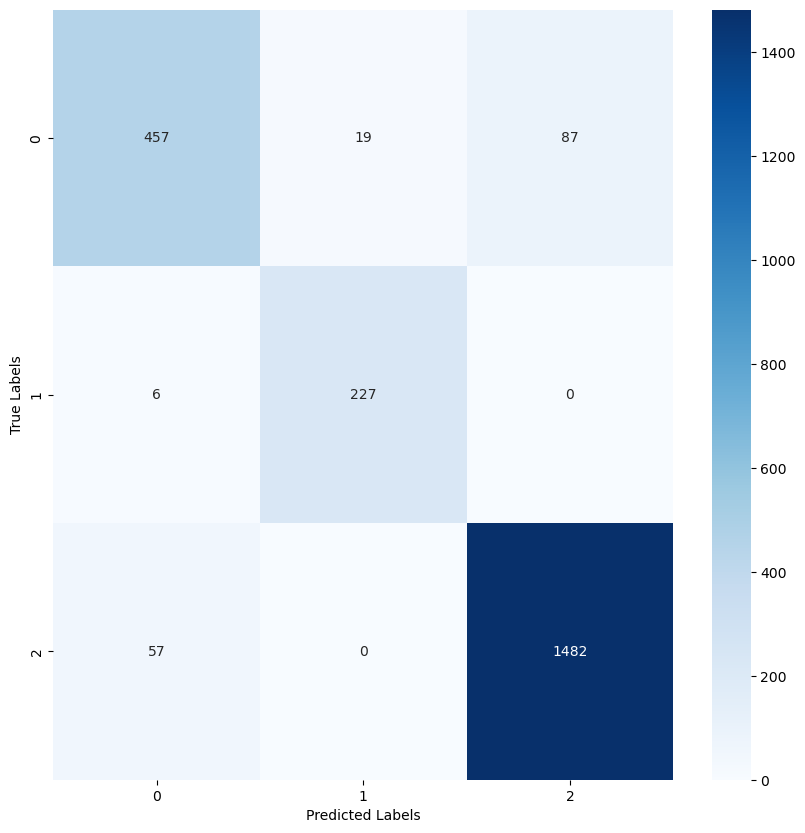

In [134]:
#This line of code obtains the indices of the maximum values in the "outputs" tensor along dimension 1, which corresponds to the predicted #
#class labels for each input in the batch.
_, preds = torch.max(outputs, 1)

#extended version of my code that saves the actual and predicted labels for all data in the training set
# Initialize lists to store all predictions and actual labels
all_preds = []
all_labels = []

# Iterate over data
for inputs, labels in dataloaders_dict['train']:
    inputs = inputs.to(device)
    labels = labels.to(device)

    # Forward pass, without tracking gradients
    with torch.set_grad_enabled(False):
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)

    # Collect predictions and actual labels
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

# Optionally, convert lists to tensors for convenience in analysis
all_preds_tensor = torch.tensor(all_preds)
all_labels_tensor = torch.tensor(all_labels)

#After collecting the predicted and actual labels, 
#you can analyze them to understand your model's performance in detail. 

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [135]:
# La confusion matrix
cm

array([[ 457,   19,   87],
       [   6,  227,    0],
       [  57,    0, 1482]], dtype=int64)

    Ce fragment de code génère un rapport de classification à partir des étiquettes réelles et des prédictions collectées lors de l'évaluation du modèle sur l'ensemble d'entraînement.   

In [136]:
from sklearn.metrics import classification_report

# Convert lists to numpy arrays if they aren't already
# Assuming all_preds and all_labels are lists of numpy arrays or PyTorch tensors
true_labels = np.array(all_labels)
predicted_labels = np.array(all_preds)

# Generate the classification report
report = classification_report(true_labels, predicted_labels, digits=4)

print(report)


              precision    recall  f1-score   support

           0     0.8788    0.8117    0.8440       563
           1     0.9228    0.9742    0.9478       233
           2     0.9446    0.9630    0.9537      1539

    accuracy                         0.9276      2335
   macro avg     0.9154    0.9163    0.9151      2335
weighted avg     0.9265    0.9276    0.9266      2335



In [137]:
#Convert Lists to Numpy Arrays (if they are not already)
import numpy as np

all_preds_array = np.array(all_preds)
all_labels_array = np.array(all_labels)

# Use classification_report to Calculate Metrics
from sklearn.metrics import classification_report

# Calculate and print the classification report
print(classification_report(all_labels_array, all_preds_array))

# Calculate Accuracy Per Class Manually
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(all_labels_array, all_preds_array)
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
print(per_class_accuracy)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       563
           1       0.92      0.97      0.95       233
           2       0.94      0.96      0.95      1539

    accuracy                           0.93      2335
   macro avg       0.92      0.92      0.92      2335
weighted avg       0.93      0.93      0.93      2335

[0.81172291 0.97424893 0.96296296]


    Cette portion de code étendue est conçue pour évaluer de manière plus détaillée la performance du modèle de réseau de neurones convolutif (CNN) sur l'ensemble de validation.    

In [138]:
#Evaluation de l'ensemble de validation
# Importation de la bibliothèque nécessaire pour la barre de progression
from tqdm import tqdm

# Met le modèle en mode d'évaluation. Cela est crucial car cela désactive des comportements spécifiques à l'entraînement,
# tels que les dropout layers et la normalisation par lots, qui ne devraient pas être utilisés lors de l'évaluation.
model_ft.eval()

# Initialisation des variables pour accumuler la perte totale et le nombre total de prédictions correctes
running_loss = 0.0
running_corrects = 0
total = 0

# Désactive le calcul du gradient, réduisant la consommation de mémoire et accélérant le processus
# puisque les gradients ne sont pas nécessaires pour l'évaluation.
with torch.no_grad():
    # Itère sur les données de l'ensemble de validation. tqdm est utilisé pour afficher une barre de progression.
    for inputs, labels in tqdm(dataloaders_dict['valid']):
        # Transfère les inputs et les labels sur le dispositif de calcul (GPU ou CPU).
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Calcule les sorties en passant les inputs à travers le modèle.
        outputs = model_ft(inputs)
        
        # Calcule la perte entre les sorties prédites et les vrais labels.
        loss = criterion(outputs, labels)
        
        # Trouve la classe prédite pour chaque input en prenant l'indice de la valeur maximale dans les prédictions logit.
        _, preds = torch.max(outputs, 1)
        
        # Accumule la perte totale en ajoutant la perte de ce lot.
        running_loss += loss.item() * inputs.size(0)
        
        # Accumule le nombre total de prédictions correctes.
        running_corrects += torch.sum(preds == labels.data)
        
        # Accumule le nombre total d'exemples vus.
        total += inputs.size(0)

# Calcule la perte moyenne sur l'ensemble de validation.
val_loss = running_loss / total

# Calcule la précision globale sur l'ensemble de validation.
val_acc = running_corrects.double() / total

# Affiche la perte moyenne et la précision sur l'ensemble de validation.
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [01:24<00:00,  1.12s/it]

Validation Loss: 0.1939
Validation Accuracy: 0.9366


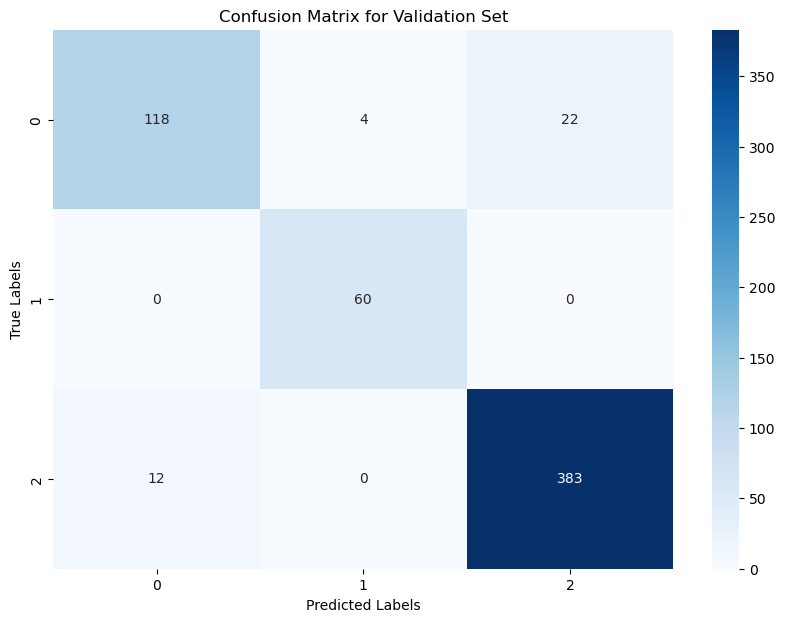

In [139]:
# Importation des bibliothèques nécessaires
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assurez-vous que le modèle est en mode évaluation
# Cela désactive les Dropout layers et normalise les batch norms pour les prédictions
model_ft.eval()

# Initialisation des listes pour stocker les prédictions et les vraies étiquettes
val_preds = []
val_labels = []

# Le DataLoader pour l'ensemble de validation itère sur les données de validation
for inputs, labels in dataloaders_dict['valid']:
    # Transfert des données et des étiquettes sur le bon dispositif (GPU ou CPU)
    inputs = inputs.to(device)
    labels = labels.to(device)

    # Pas de calcul de gradient nécessaire car nous ne sommes qu'en phase d'évaluation
    with torch.no_grad():
        # Obtenir les sorties du modèle pour les données d'entrée
        outputs = model_ft(inputs)
        
        # La fonction torch.max renvoie les valeurs maximales et leurs indices
        # Ici, nous sommes intéressés par les indices car ils correspondent aux prédictions de classe
        _, preds = torch.max(outputs, 1)
    
    # Ajout des prédictions et des vraies étiquettes aux listes, après les avoir transférées sur CPU et converties en numpy arrays
    val_preds.extend(preds.cpu().numpy())
    val_labels.extend(labels.cpu().numpy())

# Calcul de la matrice de confusion en utilisant scikit-learn
cm_val = confusion_matrix(val_labels, val_preds)

# Utilisation de Seaborn pour afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(10,7)) # Définit la taille de la figure
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels') # Étiquette pour l'axe X
plt.ylabel('True Labels') # Étiquette pour l'axe Y
plt.title('Confusion Matrix for Validation Set') # Titre de la heatmap
plt.show()

# Ce script effectue une évaluation du modèle sur l'ensemble de validation pour mesurer sa capacité à généraliser.
# La matrice de confusion donne un aperçu détaillé de la performance du modèle, montrant non seulement les prédictions correctes
# mais aussi les types d'erreurs que le modèle fait.

In [140]:
# Convertissez les listes en tableaux numpy pour une utilisation avec scikit-learn
val_true_labels_array = np.array(val_labels)
val_predictions_array = np.array(val_preds)

# Générez le rapport de classification pour l'ensemble de validation
val_report = classification_report(val_true_labels_array, val_predictions_array, digits=4)
print("Classification Report for Validation Set:\n", val_report)

# Calculez la matrice de confusion pour l'ensemble de validation
val_cm = confusion_matrix(val_true_labels_array, val_predictions_array)

# Calculez la précision par classe manuellement à partir de la matrice de confusion
val_per_class_accuracy = val_cm.diagonal() / val_cm.sum(axis=1)
print("Per-class Accuracy for the Validation Set:", val_per_class_accuracy)

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0     0.9077    0.8194    0.8613       144
           1     0.9375    1.0000    0.9677        60
           2     0.9457    0.9696    0.9575       395

    accuracy                         0.9366       599
   macro avg     0.9303    0.9297    0.9289       599
weighted avg     0.9357    0.9366    0.9354       599

Per-class Accuracy for the Validation Set: [0.81944444 1.         0.96962025]


##### Sauvegarde des graphes

In [141]:
import os
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration initiale
BASE_DIR = r'C:\Users\d\Desktop\Programme du projet sur CNN pauvreté'
GRAPH_DIR = os.path.join(BASE_DIR, 'Graph_etape_3')
os.makedirs(GRAPH_DIR, exist_ok=True)

# Fonction pour générer et sauvegarder l'histogramme de distribution
def save_histogram(data, column, title, filename):
    plt.hist(data[column], bins='auto', alpha=0.7, rwidth=0.85)
    plt.xlabel('Nightlights Bin')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(axis='y', alpha=0.75)
    plt.savefig(os.path.join(GRAPH_DIR, filename))
    plt.close()

# Fonction pour générer et sauvegarder la heatmap de la matrice de confusion
def save_confusion_matrix_heatmap(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.savefig(os.path.join(GRAPH_DIR, filename))
    plt.close()

# Fonction pour générer et sauvegarder le rapport de classification
def save_classification_report(y_true, y_pred, filename, digits=4):
    report = classification_report(y_true, y_pred, digits=digits)
    with open(os.path.join(GRAPH_DIR, filename), 'w') as f:
        f.write(report)




# Génération et sauvegarde des fichiers
save_histogram(df_download, 'nightlights_bin', 'Distribution of Nightlights Bin', 'distribution_nightlights_bin.png')
save_confusion_matrix_heatmap(all_labels, all_preds, 'Confusion Matrix for Training Set', 'confusion_matrix_train.png')
save_confusion_matrix_heatmap(val_labels, val_preds, 'Confusion Matrix for Validation Set', 'confusion_matrix_val.png')
save_classification_report(all_labels_array, all_preds_array, 'classification_report_train.txt')
save_classification_report(val_true_labels_array, val_predictions_array, 'classification_report_val.txt')
